In [ ]:
# Import dependencies

import pandas as pd
import numpy as np

from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete
from numpy.ma.core import shape
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import random
import os

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Townsend/Adam/V0.06 Townsend Data - Sheet1.csv')

In [ ]:
df.head()

In [ ]:
df["Target"] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
for i in range(0, 11202):
  if df["Close"][i] > df["1"][i]:
    df.loc[i, 'Target'] = 1
  else:
    df.loc[i, 'Target'] = 0

In [ ]:
df = df[::-1]

In [ ]:
df.head()

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [ ]:
predictors = ["1%"]
train = df.iloc[:-100]
test  = df.iloc[-100:]

In [ ]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.44594594594594594

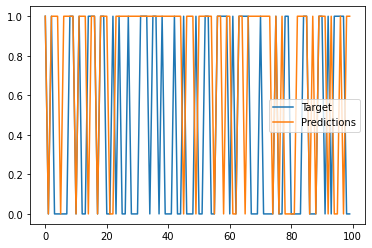

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [ ]:
i = 1000
step = 50

train = df.iloc[0:i].copy()
test = df.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

In [ ]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .5] = 1
preds[preds<=.5] = 0

In [ ]:
preds.head()

In [ ]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, df.shape[0], step):
    # Split into train and test sets
    train = df.iloc[0:i].copy()
    test = df.iloc[i:(i+step)].copy()

    # Fit the random forest model
    model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .5] = 1
    preds[preds<=.5] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

In [ ]:
predictions[0].head()

,Target,Predictions
10201,1.0,1.0
10200,0.0,1.0
10199,0.0,0.0
10198,0.0,1.0
10197,1.0,0.0


In [ ]:
def backtest(df, model, predictors, start=1000, step=50):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, df.shape[0], step):
        # Split into train and test sets
        train = df.iloc[0:i].copy()
        test = df.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .5] = 1
        preds[preds<=.5] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [ ]:
predictions = backtest(df, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

1.0    6485
0.0    3717
Name: Predictions, dtype: int64

In [ ]:
predictions["Target"].value_counts()

1.0    5461
0.0    4741
Name: Target, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5349267540478027

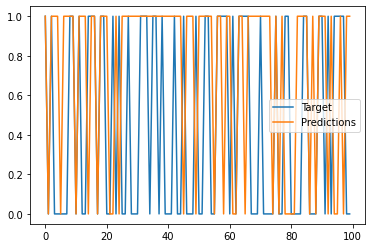

In [ ]:
predictions.iloc[-100:].plot()

In [ ]:
print(predictions)

       Target  Predictions
10201     1.0          1.0
10200     0.0          1.0
10199     0.0          0.0
10198     0.0          1.0
10197     1.0          0.0
...       ...          ...
4         0.0          1.0
3         0.0          1.0
2         1.0          1.0
1         0.0          0.0
0         1.0          1.0

[10202 rows x 2 columns]


In [ ]:
predictions

,Target,Predictions
10201,1.0,1.0
10200,0.0,1.0
10199,0.0,0.0
10198,0.0,1.0
10197,1.0,0.0
...,...,...
4,0.0,1.0
3,0.0,1.0
2,1.0,1.0
1,0.0,0.0


In [ ]:
!pip install --upgrade --quiet gspread

In [ ]:
predictions.to_csv('predictions{}.csv'.format(69), index = False)

NameError: ignored

In [ ]:
!cat predictions1.csv

Target,Predictions
1.0,1.0
0.0,1.0
0.0,0.0
0.0,1.0
1.0,0.0
0.0,1.0
0.0,0.0
0.0,0.0
1.0,0.0
1.0,1.0
1.0,1.0
0.0,1.0
0.0,0.0
1.0,0.0
0.0,1.0
1.0,1.0
0.0,1.0
1.0,0.0
1.0,1.0
1.0,1.0
0.0,1.0
1.0,0.0
0.0,1.0
0.0,0.0
1.0,1.0
0.0,1.0
0.0,0.0
1.0,1.0
0.0,1.0
0.0,0.0
0.0,1.0
0.0,0.0
1.0,1.0
0.0,1.0
0.0,0.0
0.0,0.0
1.0,0.0
0.0,1.0
0.0,0.0
1.0,0.0
0.0,1.0
0.0,1.0
0.0,0.0
0.0,0.0
0.0,0.0
1.0,0.0
1.0,1.0
0.0,1.0
0.0,1.0
1.0,1.0
0.0,1.0
0.0,0.0
1.0,0.0
1.0,1.0
1.0,1.0
1.0,1.0
0.0,1.0
1.0,0.0
0.0,1.0
1.0,0.0
0.0,1.0
0.0,1.0
1.0,0.0
1.0,1.0
0.0,0.0
1.0,1.0
1.0,1.0
1.0,1.0
0.0,1.0
0.0,0.0
0.0,1.0
1.0,0.0
1.0,1.0
0.0,1.0
0.0,0.0
1.0,0.0
1.0,1.0
1.0,1.0
1.0,1.0
0.0,1.0
0.0,0.0
0.0,1.0
1.0,0.0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
1.0,1.0
0.0,1.0
1.0,0.0
0.0,1.0
0.0,0.0
0.0,1.0
0.0,0.0
0.0,0.0
0.0,1.0
0.0,1.0
1.0,0.0
0.0,1.0
0.0,0.0
0.0,1.0
0.0,0.0
0.0,1.0
0.0,1.0
1.0,0.0
0.0,1.0
0.0,0.0
1.0,0.0
0.0,1.0
0.0,0.0
1.0,1.0
1.0,1.0
0.0,1.0
0.0,0.0
0.0,0.0
0.0,1.0
0.0,0.0
0.0,1.0
1.0,0.0
1.0,1.0
0.0,1.0
0.0,0.0
1.0,1